Generates data starting from $m$ hidden variables, choosing the visible variable from a gaussian distribution of mean $\mu_1,\mu_2$ and variance $\sigma_1^2, \sigma_2^2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

In [2]:
#Test values for mus and sigmas
mus = [1,10,11]
variances = [1,1,1]

#Number of states
m = 3

#Number of timesteps
T = 150

#Seed
npr.seed(12345)

Transition probabilities given by matrix $\mathbb{W}$ $\implies \mathbb{W}_{ij} = p(j|i)$

In [3]:
#Column i: probability of jumping to state j starting from state i
W = np.matrix([[.8,.1,.1],[.05,.9,.05],[.15,0,.85]])

In [4]:
W

matrix([[0.8 , 0.1 , 0.1 ],
        [0.05, 0.9 , 0.05],
        [0.15, 0.  , 0.85]])

Start from one of the states at random, then move

In [5]:
#Here we store the visible variables
visibles = np.array([])

#Here we store the hidden variables, just for checking
hidden = np.array([])

In [6]:
state = npr.choice(range(m))

for _ in range(T):
    #Store observable and hidden state
    visible = npr.normal(mus[state], np.sqrt(variances[state]))
    visibles = np.append(visibles,visible)
    hidden = np.append(hidden, state)
    
    #Change state
    state = npr.choice(m, p=np.squeeze(np.asarray(np.reshape(W[state,:],(1,3)))))

In [7]:
hiddenv = np.copy(hidden)

[11. 11. 11. 11.  0. 10. 10. 10. 10.]
[2. 2. 2. 2. 0. 1. 1. 1. 1.]


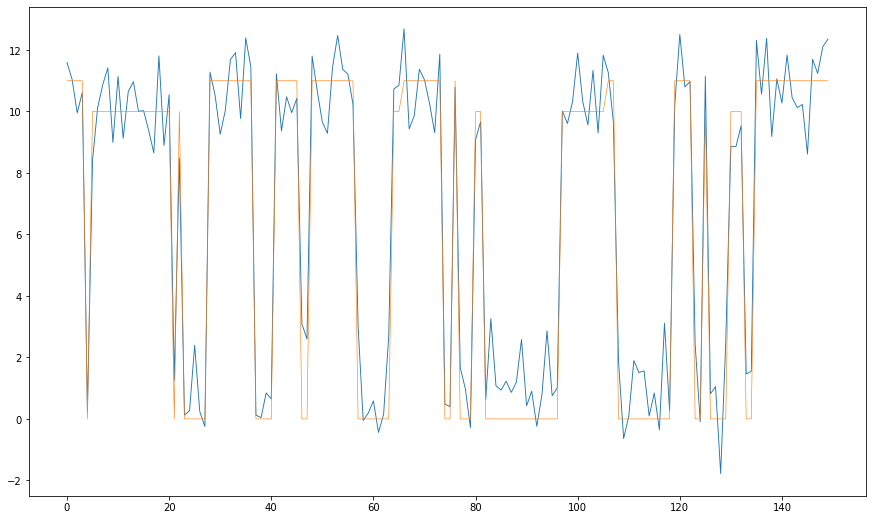

In [14]:
for i in range(1,m):
    hiddenv[hiddenv == i] = mus[i]

print(hiddenv[0:9])
print(hidden[0:9])

plt.figure(figsize=(15,9))
plt.plot(range(T), visibles, linewidth=0.9)
plt.plot(range(T), hiddenv, linewidth=0.6)
#plt.show()